# Get started with using WISE 2 in Colab
<img src="https://gitlab.com/vgg/wise/wise/-/raw/wise2/docs/assets/natural_language_search.png" alt="Screenshot of WISE online demo" width="60%"/>

**This notebook allows you to easily use the WISE Search Engine on your own collection of images/videos (stored in a folder on Google Drive).**

You can open this notebook in Google Colab using the button below:

<a target="_blank" href="https://colab.research.google.com/github/ox-vgg/demo-notebooks/blob/main/notebooks/wise2-colab.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

If you would like to use WISE 2 locally on your own computer, see the [installation instructions in our GitLab repo](https://gitlab.com/vgg/wise/wise/-/blob/wise2/docs/Install.md).

<!-- Check out our online demo of WISE with 5 million images at https://meru.robots.ox.ac.uk/unsplash/ -->

For more details about WISE, please visit our [code repo](https://gitlab.com/vgg/wise/wise/-/blob/wise2/README.md) and [software page](https://www.robots.ox.ac.uk/~vgg/software/wise/). If you have any questions, please contact horacelee@robots.ox.ac.uk

# 1 - Read Me First

This is a [Jupyter](https://jupyter.org/) notebook for using the WISE Image Search Engine on a collection of images, and is designed to run in [Google
Colab](https://colab.research.google.com/).
<!-- If you are not reading
this notebook in Google Colab, click
[here](https://colab.research.google.com/github/ox-vgg/follow-things-around/blob/main/tracking.ipynb). -->


### 1.1 - What is, and how to use, a Jupyter notebook

A Jupyter notebook is a series of "cells".  Each cell contains either text (like this one) or code (like others below).  A cell that contains code will have a "Run cell" button on the left side like this
"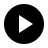".
When you click the "Run cell" button, the code in that cell will run and when it finishes, a green check mark appears next to the "Run cell" button".  You need to wait for the code in that cell to finish before "running" the next cell.


### 1.2 - Particulars of this notebook

You must run the cells in this notebook one after the other since each cell is dependent on the results of the previous cell.

This notebook also has some interactive cells, namely in the options sections.  After setting their values, these cells must be run, just like other code cells.  Setting their values only has effect after you "run" the cell.

# 2 - Setup and Installation

### 2.1 - Check for GPU access

A GPU is highly recommended for faster processing speeds, as your videos might take a long time to process without a GPU.

In [1]:
#@markdown By default, this notebook will run with a GPU.  However, it
#@markdown is possible that you were not allocated one, typically
#@markdown because you've used up all your GPU resources.  If you get
#@markdown a message saying that you do not have access to a GPU,
#@markdown navigate to "Edit" -> "Notebook Settings" and select "GPU"
#@markdown from the "Hardware Accelerator" menu.  Once you change it,
#@markdown you need to run this cell again.

import torch.cuda

if torch.cuda.is_available():
    DEVICE = "cuda"
    print("You are using this GPU:")
    print(
        "GPU %d: %s (%d GB)"
        % (
            torch.cuda.current_device(),
            torch.cuda.get_device_name(),
            torch.cuda.get_device_properties(
                torch.cuda.current_device()
            ).total_memory
            * 1e-9,
        )
    )
else:
    DEVICE = "cpu"
    print("You are not connected to a GPU.  This might be a bit slow.")
    print("Consider reconnecting to a runtime with GPU access.")

You are using this GPU:
GPU 0: Tesla T4 (15 GB)


## 2.2 - Install WISE

In [2]:
#@markdown This cell installs WISE and the software packages WISE uses. This will take 1-2 minutes.

%cd -q /content
# For now, clone the `wise2-image-video-frontend` branch as it hasn't been merged into `wise2` yet
!git clone --quiet -b wise2-image-video-frontend https://gitlab.com/vgg/wise/wise.git
!pip install --quiet -r wise/requirements.txt
# !pip install --quiet open-clip-torch==2.26.1 # install a newer version of open-clip-torch to support MobileCLIP
!pip install --quiet --no-deps msclap==1.3.3
!pip install --quiet faiss-gpu==1.7.2

# Temporary hack
%cd -q /content/wise/frontend
!npm install --silent
!npm run build --silent -- --logLevel error

%cd -q /content/wise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.4/109.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.7/253.7 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.5/705.5 kB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 107.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.0/409.0 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 78.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31

# 3 - Create a project with your images/videos

## 3.1 - Mount Google Drive or download an example set of images

In [3]:
#@title  {"run":"auto"}
#@markdown You can choose to either:
#@markdown 1. Mount your Google Drive (if you want to use WISE on your
#@markdown own images/videos)
#@markdown 2. Or you can download an example set of images (of cats and dogs)

mount_drive_or_download_example = "Download example images" # @param ["Mount Google Drive","Download example images"]

#@markdown If you choose the Google Drive option, you will be asked to
#@markdown grant access to your Google Drive Files.  This is required
#@markdown to access the images/videos you want to use in WISE. Once
#@markdown you click on "Connect to Google Drive", a pop-up window will
#@markdown appear to choose a Google Account and then to allow access to
#@markdown "Google Drive for desktop".

if mount_drive_or_download_example == "Mount Google Drive":
    from google.colab import drive
    drive.mount('/content/drive')
    print('Google Drive mounted. Please see your files in the `drive` folder in the "Files" menu in the left sidebar')
else:
    print(f'Downloading example images (Oxford-IIIT Pet Dataset)')
    %cd -q /content
    # Download .tar.gz file and extract images
    # Delete images.tar.gz in case the user is re-running this cell
    !rm -f images.tar.gz && \
      wget https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz && \
      echo "Extracting images" && \
      tar -zxvf images.tar.gz | tqdm > /dev/null
    %cd -q /content/wise

--2024-11-04 12:38:50--  https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 308 Permanent Redirect
Location: https://thor.robots.ox.ac.uk/pets/images.tar.gz [following]
--2024-11-04 12:38:51--  https://thor.robots.ox.ac.uk/pets/images.tar.gz
Reusing existing connection to thor.robots.ox.ac.uk:443.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [application/octet-stream]
Saving to: ‘images.tar.gz’

images.tar.gz       100%[===================>] 755.23M  25.4MB/s    in 31s     

2024-11-04 12:39:22 (24.5 MB/s) - ‘images.tar.gz’ saved [791918971/791918971]

Extracting images
7394it [00:09, 784.17it/s] 


## 3.2 - Choose a folder of images/videos

In [4]:
#@markdown Specify the folder of images/videos you want to use:
#@markdown
#@markdown - **If you mounted your Google Drive**, open the "Files" tab
#@markdown (<img height="18rem" alt="Files icon" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAGAAAABgCAYAAADimHc4AAAAAXNSR0IArs4c6QAAAERlWElmTU0AKgAAAAgAAYdpAAQAAAABAAAAGgAAAAAAA6ABAAMAAAABAAEAAKACAAQAAAABAAAAYKADAAQAAAABAAAAYAAAAACpM19OAAADqElEQVR4Ae2csYsTQRSHd3ZDjiPIWVraaCHCEThsPbC8OjZyehjUNMHG3lxvoSAYA9Hzzi611wlnJ3Jw+h/Y2IogAQ23GWdMSGDJzsw+n3Fm/V21O7Pvl7ffl02yOTJRhD8QAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAAEQAIGyExBFT/Bms3VFjsdNKaLNRIjzUSSqRTOKHC/TcWd/r7dbpCakY50FNBqNarV29kklSe6pE3Su44AhZLS796Lb4cjyLSNxaajdbq+kIjlM4sp1dfxS4f/uT11t9fqG+HhyfOTSb0jHOAm4cGn96RT+vzu3kkqwCtCv+UkcdxX55T/zs7pLKCHOnmN2X7/hegF/2ph683+4c7vVyfYZ6r5dgHrW+XZyZZJgFTD5qOmbgigqiwTr6/qtZkua8L/qd60Zpvrs3Pb2g1qyMnwjpbyanfNzX45SKT+rj8pHIo77+/3uhyJ9Wq+AImEcxx4cPBqmP2tbQoh3HHl/P0NUExFfjOP4rnomvr+xc+eZvmdyfVzvBOjGw5Mwwy3UjWpr9czaob53mo0aNrwUoPsNWEIkROXa1+8/Hhu4z6a8FRC6BP2Vjb6HmpHO2fBaQOASxPQeKgf9ZNh7ASFL0N8YG+mrySAEhCrB5R6qYjPk07x+Y1b9bPrUk/k+yf6/kmCuAJ+gc/YCAZw0CVkQQIDGWQIBnDQJWRBAgMZZAgGcNAlZEECAxlkCAZw0CVkQQIDGWQIBnDQJWRBAgMZZAgGcNAlZEECAxlkCAZw0CVkQQIDGWQIBnDQJWRBAgMZZAgGcNAlZEECAxlkCAZw0CVkQQIDGWQIBnDQJWRBAgMZZAgGcNAlZEECAxlkCAZw0CVkQQIDGWQIBnDQJWRBAgMZZAgGcNAlZEECAxlkCAZw0CVkQQIDGWQIBnDQJWRBAgMZZAgGcNAlZEECAxlkCAZw0CVkQQIDGWeLwO2E5Mq0Nav6dLGerIWZpduY/6xWgFyMyR2A2j4ALO6sAvRJU3gNg3EzAhZ1dgFqGSz2Mcdkycxv/7azUS5jZzt66buink+Mvl9fr59SSXBu2MMzPCZym6fPXL3u9+cjiLesVoMtGw2/3pTx9uzgCo1kCmpVmlh1ftO8kYDAYjNZqq1vKql5BFy9Hi0hOxqRmpFlpZvmHzWcKLzm57OXr5636uvVny1b6elboCwRAAARAAARAAARAAARAAARAAARAAARAAARAAARAAARAgI/AL2RB1YUYmnX7AAAAAElFTkSuQmCC" />)
#@markdown in the left sidebar. The `drive` folder contains your
#@markdown Google Drive files.  Navigate the files, right click on the
#@markdown desired folder containing your images/videos, and select
#@markdown "Copy path".  Then paste the path in the MEDIA_DIRECTORY field below.
#@markdown Do not forget to then "run" this cell.
#@markdown
#@markdown - **If you downloaded the example images**, enter
#@markdown "/[]()content/images/" in the MEDIA_DIRECTORY field below:

#@markdown Be careful not to accidentally delete any files in your Google Drive!

MEDIA_DIRECTORY = "/content/images" #@param {type:"string"}

#@markdown Don't forget to run this cell after entering the filepath!

import os
if not MEDIA_DIRECTORY:
    raise Exception('MEDIA_DIRECTORY is empty, you must set it.')
if not os.path.isdir(MEDIA_DIRECTORY):
    raise Exception(
        'The MEDIA_DIRECTORY \'%s\' does not exist or is not a valid folder' % MEDIA_DIRECTORY
    )

In [5]:
#@markdown ## 3.3 Initialise a project from the folder of images/videos

#@markdown This step creates a WISE project and processes your images using a
#@markdown vision model (and an audio model if you videos contain audio).

#@markdown Enter a folder path where you would like the project to be saved
#@markdown in, or leave it as it is:
PROJECT_DIRECTORY = "/content/my-project" #@param {type:"string"}

#@markdown ### Vision model selection
#@markdown We support a wide range of models from [OpenCLIP](https://github.com/mlfoundations/open_clip).
#@markdown The default model is "ViT-B-32:datacomp_xl_s13b_b90k", but feel free to select another model
#@markdown (e.g. you can use a larger model such as "xlm-roberta-large-ViT-H-14:frozen_laion5b_s13b_b90k"
#@markdown for more accurate results).

VISION_MODEL = "ViT-B-32:datacomp_xl_s13b_b90k" # @param ['RN50:openai', 'RN50:yfcc15m', 'RN50:cc12m', 'RN50-quickgelu:openai', 'RN50-quickgelu:yfcc15m', 'RN50-quickgelu:cc12m', 'RN101:openai', 'RN101:yfcc15m', 'RN101-quickgelu:openai', 'RN101-quickgelu:yfcc15m', 'RN50x4:openai', 'RN50x16:openai', 'RN50x64:openai', 'ViT-B-32:openai', 'ViT-B-32:laion400m_e31', 'ViT-B-32:laion400m_e32', 'ViT-B-32:laion2b_e16', 'ViT-B-32:laion2b_s34b_b79k', 'ViT-B-32:datacomp_xl_s13b_b90k', 'ViT-B-32:datacomp_m_s128m_b4k', 'ViT-B-32:commonpool_m_clip_s128m_b4k', 'ViT-B-32:commonpool_m_laion_s128m_b4k', 'ViT-B-32:commonpool_m_image_s128m_b4k', 'ViT-B-32:commonpool_m_text_s128m_b4k', 'ViT-B-32:commonpool_m_basic_s128m_b4k', 'ViT-B-32:commonpool_m_s128m_b4k', 'ViT-B-32:datacomp_s_s13m_b4k', 'ViT-B-32:commonpool_s_clip_s13m_b4k', 'ViT-B-32:commonpool_s_laion_s13m_b4k', 'ViT-B-32:commonpool_s_image_s13m_b4k', 'ViT-B-32:commonpool_s_text_s13m_b4k', 'ViT-B-32:commonpool_s_basic_s13m_b4k', 'ViT-B-32:commonpool_s_s13m_b4k', 'ViT-B-32-256:datacomp_s34b_b86k', 'ViT-B-32-quickgelu:openai', 'ViT-B-32-quickgelu:laion400m_e31', 'ViT-B-32-quickgelu:laion400m_e32', 'ViT-B-32-quickgelu:metaclip_400m', 'ViT-B-32-quickgelu:metaclip_fullcc', 'ViT-B-16:openai', 'ViT-B-16:laion400m_e31', 'ViT-B-16:laion400m_e32', 'ViT-B-16:laion2b_s34b_b88k', 'ViT-B-16:datacomp_xl_s13b_b90k', 'ViT-B-16:datacomp_l_s1b_b8k', 'ViT-B-16:commonpool_l_clip_s1b_b8k', 'ViT-B-16:commonpool_l_laion_s1b_b8k', 'ViT-B-16:commonpool_l_image_s1b_b8k', 'ViT-B-16:commonpool_l_text_s1b_b8k', 'ViT-B-16:commonpool_l_basic_s1b_b8k', 'ViT-B-16:commonpool_l_s1b_b8k', 'ViT-B-16:dfn2b', 'ViT-B-16-quickgelu:metaclip_400m', 'ViT-B-16-quickgelu:metaclip_fullcc', 'ViT-B-16-plus-240:laion400m_e31', 'ViT-B-16-plus-240:laion400m_e32', 'ViT-L-14:openai', 'ViT-L-14:laion400m_e31', 'ViT-L-14:laion400m_e32', 'ViT-L-14:laion2b_s32b_b82k', 'ViT-L-14:datacomp_xl_s13b_b90k', 'ViT-L-14:commonpool_xl_clip_s13b_b90k', 'ViT-L-14:commonpool_xl_laion_s13b_b90k', 'ViT-L-14:commonpool_xl_s13b_b90k', 'ViT-L-14-quickgelu:metaclip_400m', 'ViT-L-14-quickgelu:metaclip_fullcc', 'ViT-L-14-quickgelu:dfn2b', 'ViT-L-14-336:openai', 'ViT-H-14:laion2b_s32b_b79k', 'ViT-H-14-quickgelu:metaclip_fullcc', 'ViT-H-14-quickgelu:dfn5b', 'ViT-H-14-378-quickgelu:dfn5b', 'ViT-g-14:laion2b_s12b_b42k', 'ViT-g-14:laion2b_s34b_b88k', 'ViT-bigG-14:laion2b_s39b_b160k', 'roberta-ViT-B-32:laion2b_s12b_b32k', 'xlm-roberta-base-ViT-B-32:laion5b_s13b_b90k', 'xlm-roberta-large-ViT-H-14:frozen_laion5b_s13b_b90k', 'convnext_base:laion400m_s13b_b51k', 'convnext_base_w:laion2b_s13b_b82k', 'convnext_base_w:laion2b_s13b_b82k_augreg', 'convnext_base_w:laion_aesthetic_s13b_b82k', 'convnext_base_w_320:laion_aesthetic_s13b_b82k', 'convnext_base_w_320:laion_aesthetic_s13b_b82k_augreg', 'convnext_large_d:laion2b_s26b_b102k_augreg', 'convnext_large_d_320:laion2b_s29b_b131k_ft', 'convnext_large_d_320:laion2b_s29b_b131k_ft_soup', 'convnext_xxlarge:laion2b_s34b_b82k_augreg', 'convnext_xxlarge:laion2b_s34b_b82k_augreg_rewind', 'convnext_xxlarge:laion2b_s34b_b82k_augreg_soup', 'coca_ViT-B-32:laion2b_s13b_b90k', 'coca_ViT-B-32:mscoco_finetuned_laion2b_s13b_b90k', 'coca_ViT-L-14:laion2b_s13b_b90k', 'coca_ViT-L-14:mscoco_finetuned_laion2b_s13b_b90k', 'EVA01-g-14:laion400m_s11b_b41k', 'EVA01-g-14-plus:merged2b_s11b_b114k', 'EVA02-B-16:merged2b_s8b_b131k', 'EVA02-L-14:merged2b_s4b_b131k', 'EVA02-L-14-336:merged2b_s6b_b61k', 'EVA02-E-14:laion2b_s4b_b115k', 'EVA02-E-14-plus:laion2b_s9b_b144k', 'ViT-B-16-SigLIP:webli', 'ViT-B-16-SigLIP-256:webli', 'ViT-B-16-SigLIP-i18n-256:webli', 'ViT-B-16-SigLIP-384:webli', 'ViT-B-16-SigLIP-512:webli', 'ViT-L-16-SigLIP-256:webli', 'ViT-L-16-SigLIP-384:webli', 'ViT-SO400M-14-SigLIP:webli', 'ViT-SO400M-14-SigLIP-384:webli', 'ViT-L-14-CLIPA:datacomp1b', 'ViT-L-14-CLIPA-336:datacomp1b', 'ViT-H-14-CLIPA:datacomp1b', 'ViT-H-14-CLIPA-336:laion2b', 'ViT-H-14-CLIPA-336:datacomp1b', 'ViT-bigG-14-CLIPA:datacomp1b', 'ViT-bigG-14-CLIPA-336:datacomp1b', 'nllb-clip-base:v1', 'nllb-clip-large:v1', 'nllb-clip-base-siglip:v1', 'nllb-clip-large-siglip:v1']

VISION_MODEL = f"mlfoundations/open_clip/{'/'.join(VISION_MODEL.split(':'))}"

#@markdown ### Audio model selection
#@markdown Currently we only support 1 audio model (Microsoft CLAP)
AUDIO_MODEL = "Microsoft CLAP" # @param ['Microsoft CLAP']

#@markdown If this step is too slow, you can use a GPU to speed up the image processing.
#@markdown To do that, go to "Runtime" -> "Change runtime type" and select a GPU option such as "T4 GPU" under "Hardware accelerator".
#@markdown You will need to re-run the cells in this notebook from the beginning.

ok_to_create_project = True
if os.path.exists(PROJECT_DIRECTORY):
    print(f"Project folder already exists at {PROJECT_DIRECTORY}")
    user_input = input('Would you like to delete the project folder and re-create the project (yes/no):')

    yes_choices = ['yes', 'y']
    no_choices = ['no', 'n']

    if user_input.lower() in yes_choices:
        !rm -rf "{PROJECT_DIRECTORY}"
    elif user_input.lower() in no_choices:
        ok_to_create_project = False
    else:
        print('Invalid input. Please type yes or no')
        ok_to_create_project = False

if ok_to_create_project:
    %cd -q /content/wise
    !python3 extract-features.py \
      "{MEDIA_DIRECTORY}" \
      --project-dir "{PROJECT_DIRECTORY}" \
      --image-feature-id "{VISION_MODEL}" \
      --video-feature-id "{VISION_MODEL}"

"""
Inference speed (CPU) on Kinetics-6 videos (with audio feature extraction as well)
MobileCLIP-B/datacompdr_lt: 591it in 447s = 1.32it/s

Inference speed (CPU) on Pets dataset:
- xlm-roberta-large-ViT-H-14/frozen_laion5b_s13b_b90k: around 0.12im/s
- ViT-B-32/openai: around 3.1im/s
- MobileCLIP-B/datacompdr_lt: around 1.37im/s
- MobileCLIP-S2/datacompdr: around 1.58im/s
- MobileCLIP-S1/datacompdr: around 2.17im/s

Inference speed (T4 GPU) on Pets dataset:
- ViT-B-32/openai: around 45im/s
- MobileCLIP-S1/datacompdr: around 20im/s

Note: model wasn't reparameterized (inference speed might be faster with reparameterization)
""";

/usr/local/lib/python3.10/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
Initialising internal metadata database
2024-11-04 12:40:22,700 (MainThread): root - INFO - Skipping 3 files that are not valid media in directory "/content/images"
100% 7390/7390 [00:03<00:00, 1977.50it/s]
2024-11-04 12:40:26,445 (MainThread): root - INFO - Initialising feature extractor
2024-11-04 12:40:26,451 (MainThread): root - INFO - Loaded ViT-B-32 model config.
open_clip_pytorch_model.bin: 100% 605M/605M [00:03<00:00, 159MB/s]
2024-11-04 12:40:32,499 (MainThread): root - INFO - Loading pretrained ViT-B-32 weights (datacomp_xl_s13b_b90k).
Using mlfoundations/open_clip/ViT-B-32/datacomp_xl_s13b_b90k for image
# writing /content/my-project/store/mlfoundations/open_clip/ViT-B-32/datacomp_xl_s13b_b90k/features/im

In [6]:
#@markdown ## 3.4 Create a search index
#@markdown This step creates a search index to enable fast and accurate search.

#@markdown If you have a large collection of images (e.g. more than 1 million images),
#@markdown you can change the index type to 'IndexIVFFlat' to enable faster search times at the cost of slightly reduced retrieval accuracy.
#@markdown Otherwise you can leave this setting at its default value ('IndexFlatIP').
INDEX_TYPE = "IndexFlatIP" # @param ["IndexFlatIP", "IndexIVFFlat"]

%cd -q /content/wise
!python3 create-index.py \
  --project-dir "{PROJECT_DIRECTORY}" \
  --index-type {INDEX_TYPE}

/usr/local/lib/python3.10/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
Adding feature vectors to index
100% 7390/7390 [00:01<00:00, 7352.16it/s]
  saved index to /content/my-project/store/mlfoundations/open_clip/ViT-B-32/datacomp_xl_s13b_b90k/index/image-IndexFlatIP.faiss


# 4 - Search with WISE web interface

In [7]:
#@markdown Display the web interface for WISE so that you can perform searches.
#@markdown
#@markdown **Once you see the web interface show up below, you can start searching
#@markdown there** (scroll down a bit if needed), even if it looks like this cell
#@markdown is still loading/running.

%cd -q /content/wise
from pathlib import Path
from google.colab.output import serve_kernel_port_as_iframe

%env HOSTNAME=0.0.0.0
from api import serve
import nest_asyncio
nest_asyncio.apply()

import logging
logging.disable(logging.INFO)

def callback():
  print()
  print('Server started. You can start searching with WISE below (scroll down a bit to see the full interface)')
  serve_kernel_port_as_iframe(9670, path=f'/{Path(PROJECT_DIRECTORY).stem}/', height=800)

print('Starting server')
serve(Path(PROJECT_DIRECTORY), index_type=INDEX_TYPE, theme_asset_dir='frontend/dist', callback=callback)

env: HOSTNAME=0.0.0.0


/usr/local/lib/python3.10/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


Starting server


100%|██████████| 4/4 [00:00<00:00,  7.46it/s]


Server started. You can start searching with WISE below (scroll down a bit to see the full interface)



[{'url': '/content/my-project/store/mlfoundations/ base: None name: None nfiles: 4 nbytes: 30300160 samples: 7390 cache: /tmp/_wids_cache


<IPython.core.display.Javascript object>

shutting down
shutting down
shutting down
